Doanh số bán
Thấp    9
Cao     6
Name: count, dtype: int64

Độ lợi thông tin data là: 0.9709505944546686
Độ lợi thông tin các thuộc tính:
    Loại: 0.7303078961588811
    Số màu: 0.0038680993428971133
    Kích thước: 0.0049355947431311
    Chất liệu: 0.32365019815155627

Độ chính xác của cây ID3: 0.9333333333333333


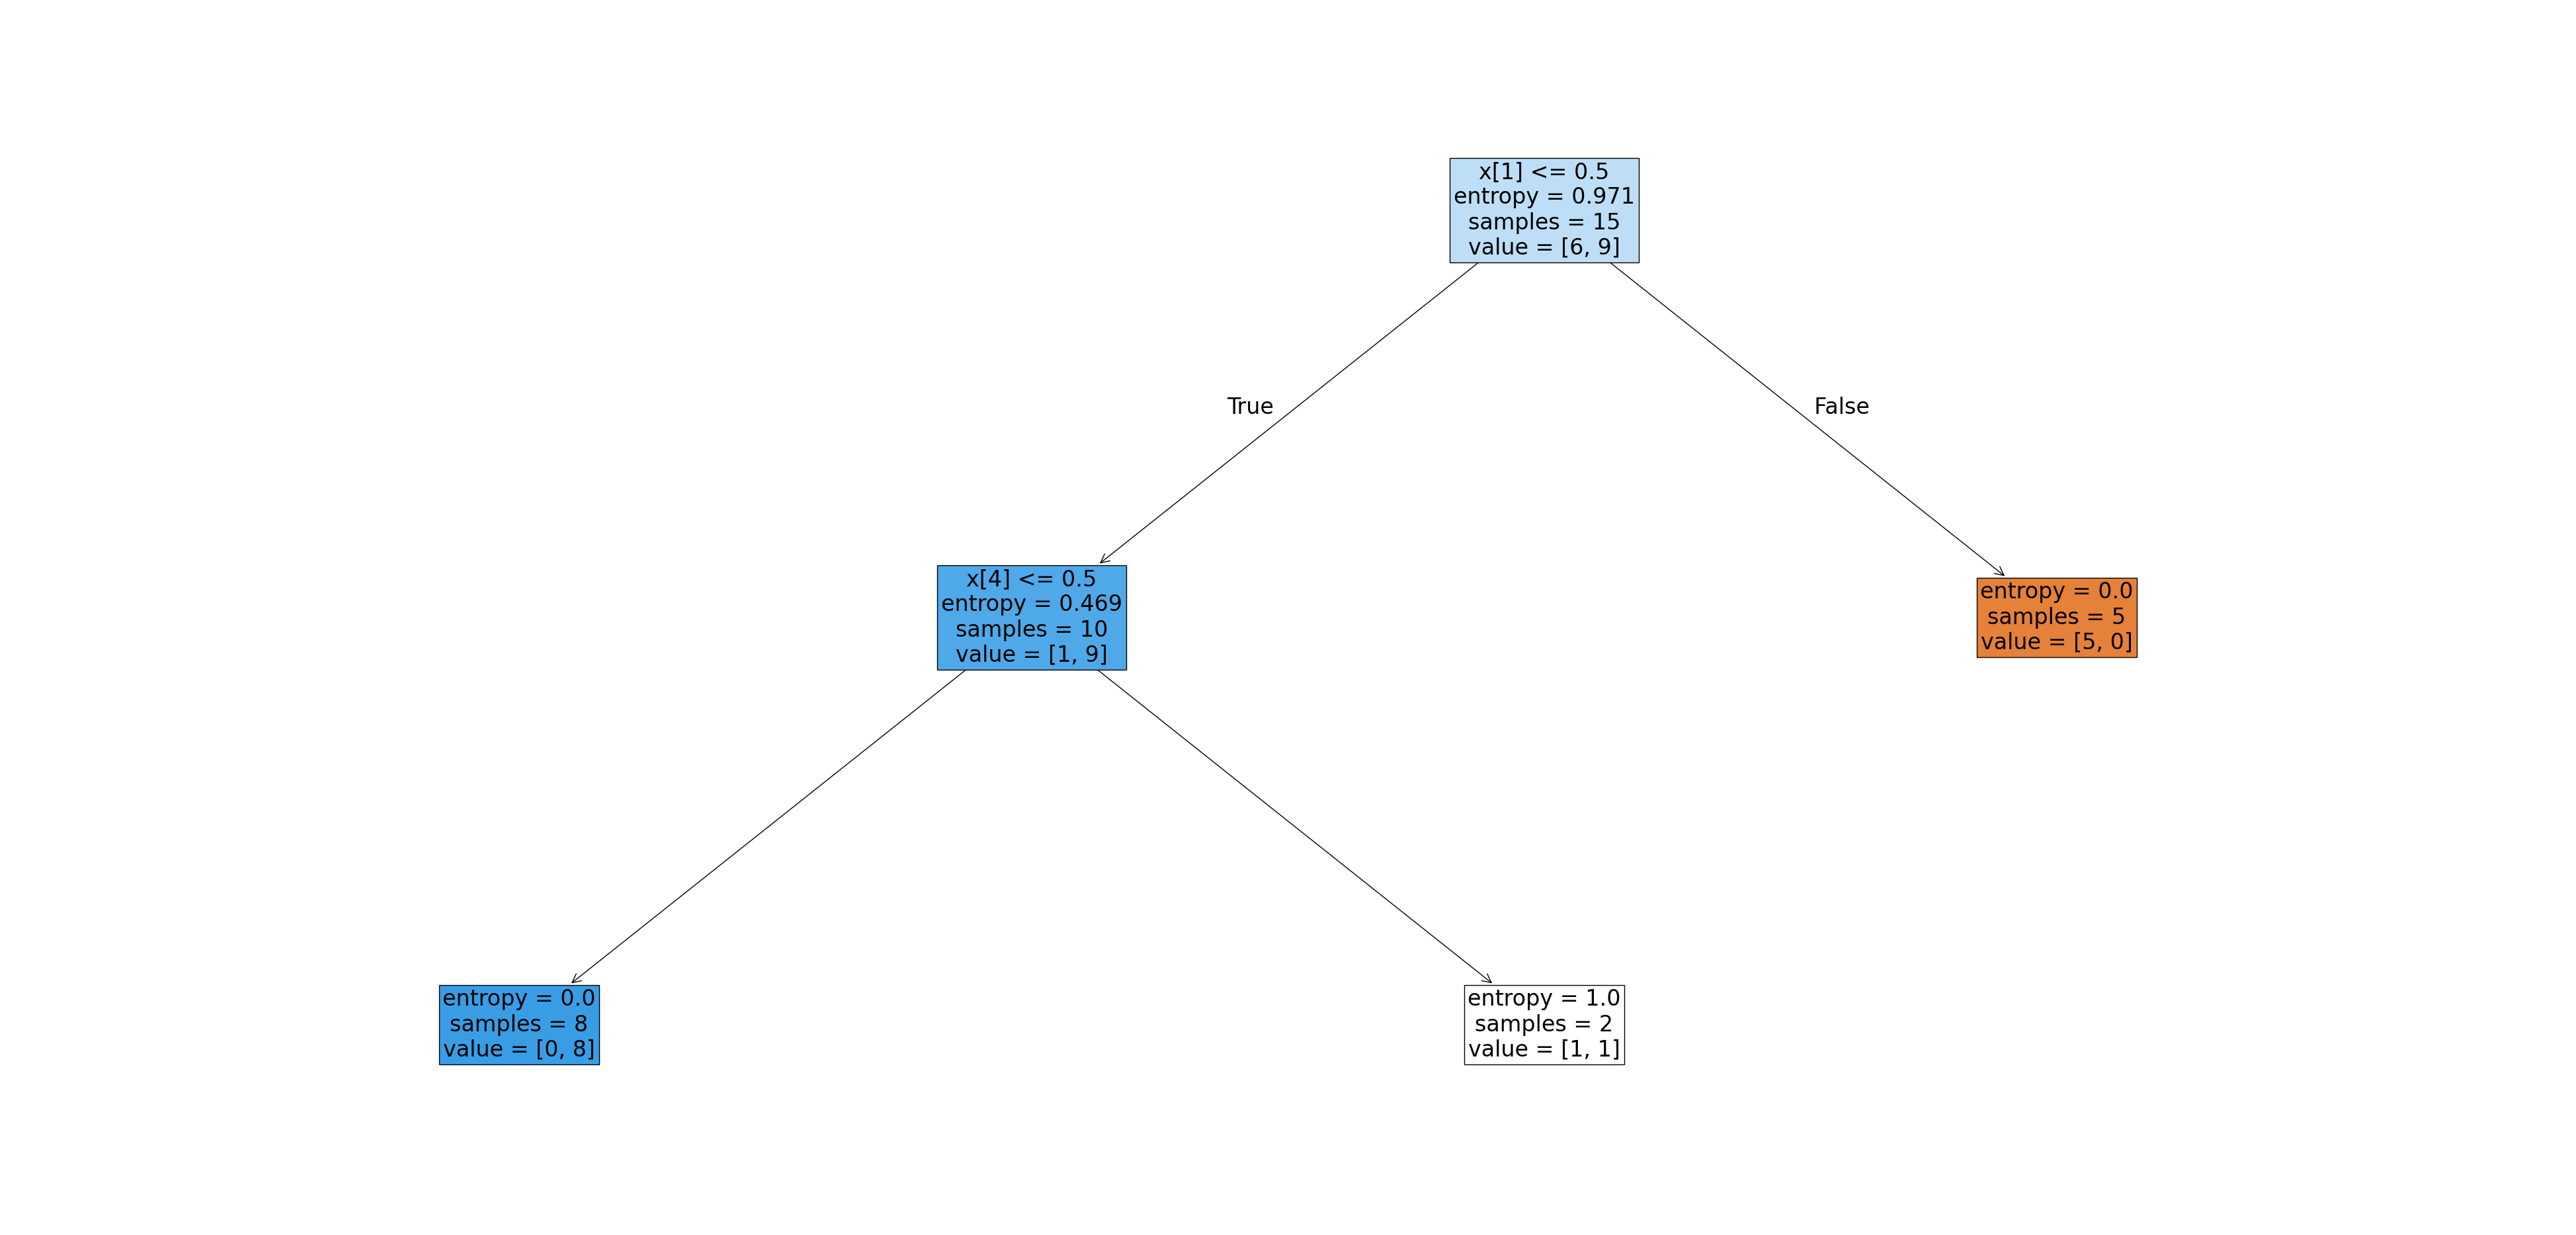

Chỉ số Gini cho các thuộc tính:
    Loại: 0.3733333333333334
    Số màu: 0.0025396825396825085
    Kích thước: 0.003333333333333355
    Chất liệu: 0.16000000000000003

Độ chính xác của cây CART: 0.8


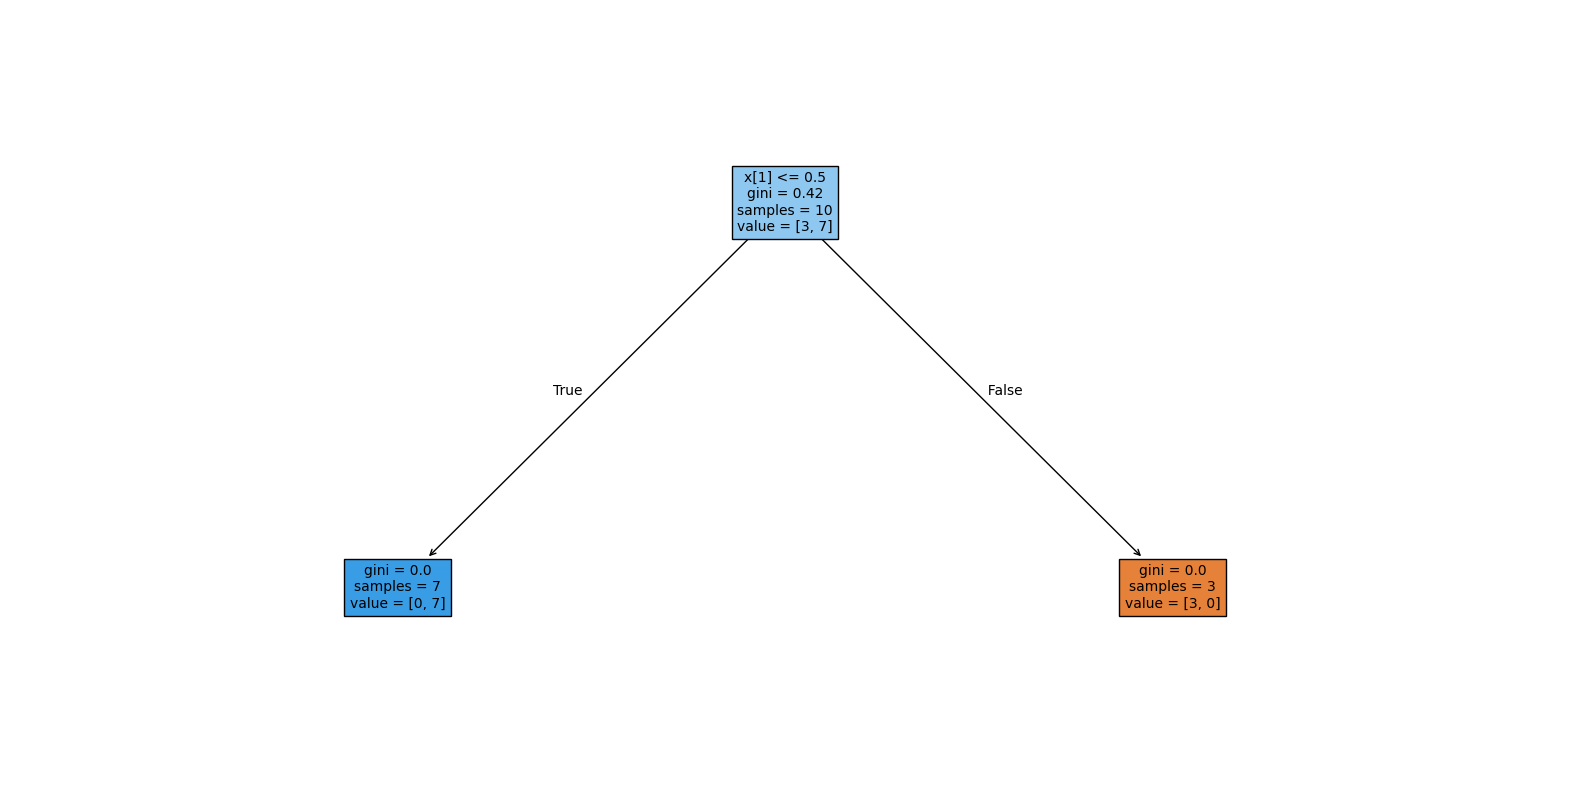

Dự đoán Doanh số bán cho các sản phẩm mới dùng ID3: ['Cao' 'Thấp' 'Thấp']

Dự đoán Doanh số bán cho các sản phẩm mới dùng Naive Bayes: ['Thấp' 'Thấp' 'Thấp']


In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Tạo bảng dữ liệu
data = pd.DataFrame({
    "Loại": ["Điều khiển", "Xếp hình", "Xếp hình", "Điều khiển", "Điều khiển", 
             "Búp bê", "Búp bê", "Búp bê", "Xếp hình", "Xếp hình", 
             "Điều khiển", "Búp bê", "Xếp hình", "Điều khiển", "Búp bê"],
    "Số màu": [3, 5, 7, 5, 3, 5, 5, 7, 3, 7, 5, 5, 7, 5, 7],
    "Kích thước": ["Nhỏ", "Vừa", "To", "To", "Nhỏ", "Vừa", "Vừa", "To", 
                    "To", "Vừa", "To", "To", "To", "Vừa", "To"],
    "Chất liệu": ["Nhựa PP", "Cao su", "Nhựa PP", "Cao su", "Nhựa PP", 
                  "Nhựa PP", "Nhựa PP", "Nhựa PP", "Nhựa PP", "Nhựa PP", 
                  "Cao su", "Nhựa PP", "Cao su", "Cao su", "Nhựa PP"],
    "Doanh số bán": ["Cao", "Thấp", "Thấp", "Thấp", "Thấp", "Cao", 
                     "Cao", "Cao", "Thấp", "Thấp", "Thấp", "Cao", 
                     "Thấp", "Thấp", "Cao"]
})

# Kiểm tra phân bố nhãn
print(data['Doanh số bán'].value_counts())
print()

# Hàm tính Information
def information(data):
    labels = data["Doanh số bán"]
    label_counts = Counter(labels)
    information_value = 0
    total = len(labels)

    for count in label_counts.values():
        probability = count / total
        information_value -= probability * math.log2(probability)
    return information_value

# Hàm tính Gain
def gain(data, attribute):
    total_information = information(data)
    values = data[attribute].unique()
    entropy = 0
    
    for value in values:
        subset = data[data[attribute] == value]
        subset_information = information(subset)
        entropy += (len(subset) / len(data)) * subset_information
        
    return total_information - entropy

# Tính tổng information
total_information = information(data)

# Tính Gain cho từng thuộc tính
attributes = ["Loại", "Số màu", "Kích thước", "Chất liệu"]
gains = {attr: gain(data, attr) for attr in attributes}

# Kết quả information tổng và Gain
print("Độ lợi thông tin data là:", total_information)
print("Độ lợi thông tin các thuộc tính:")
for attr, gain_value in gains.items():
    print(f"    {attr}: {gain_value}")

#=====================================
#======= Biểu diễn cây ID3 ===========
#=====================================

# Chuyển đổi các cột không phải dạng số về dạng one-hot vector
features = data.drop('Doanh số bán', axis=1) 
labels = data['Doanh số bán']

features.select_dtypes(exclude=['int64']).columns
features_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64']).columns)

# Tách ra thành 2 phần huấn luyện và kiểm thử
X_train = features_onehot[:30162]
X_test = features_onehot[:30162]
y_train = labels[:30162]
y_test = labels[:30162]

# Xây dựng cây
clf = DecisionTreeClassifier(criterion="entropy", random_state=0)
clf.fit(X_train, y_train)

# Áp dụng mô hình trên dữ liệu kiểm thử
tree_pred = clf.predict(X_test)
tree_score = metrics.accuracy_score(y_test, tree_pred)
print()
print("Độ chính xác của cây ID3:", tree_score)

fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=24, ax=ax)
plt.savefig('decision_tree.png', dpi=100)
plt.show()

#=====================================
#============ Tính Gini ==============
#=====================================

def gini_index(data):
    labels = data["Doanh số bán"]
    label_counts = labels.value_counts(normalize=True)
    gini = 1 - sum(label_counts ** 2)
    return gini

def gini_gain(data, attribute):
    total_gini = gini_index(data)
    values = data[attribute].unique()
    weighted_gini = 0
    
    for value in values:
        subset = data[data[attribute] == value]
        weighted_gini += (len(subset) / len(data)) * gini_index(subset)
        
    return total_gini - weighted_gini

gini_results = {attr: gini_gain(data, attr) for attr in attributes}

# In kết quả
print("Chỉ số Gini cho các thuộc tính:")
for attr, gini_value in gini_results.items():
    print(f"    {attr}: {gini_value}")

#=====================================
#========= Cây quyết định  ===========
#=====================================

features_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64']).columns)
X_train, X_test, y_train, y_test = train_test_split(features_onehot, labels, test_size=0.3, random_state=42)

# Xây dựng cây quyết định với thuật toán CART
cart_clf = DecisionTreeClassifier(criterion="gini", random_state=0)
cart_clf.fit(X_train, y_train)

# Dự đoán trên dữ liệu kiểm thử
cart_pred = cart_clf.predict(X_test)
cart_score = metrics.accuracy_score(y_test, cart_pred)

print("\nĐộ chính xác của cây CART:", cart_score)

# Vẽ cây quyết định
fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(cart_clf, filled=True, fontsize=10, ax=ax)
plt.savefig('cart_decision_tree.png', dpi=100)
plt.show()

#=====================================
#===== Dùng cây ID3 dự đoán  =========
#=====================================

new_data = pd.DataFrame({
    "Loại": ["Búp bê", "Xếp hình", "Điều khiển"],
    "Số màu": [3, 5, 3],
    "Kích thước": ["To", "To", "Vừa"],
    "Chất liệu": ["Cao su", "Nhựa PP", "Cao su"]
})

# Chuyển đổi các cột không phải dạng số về dạng one-hot vector
new_data_onehot = pd.get_dummies(new_data, columns=new_data.select_dtypes(exclude=['int64']).columns)

# Đảm bảo rằng DataFrame mới có cùng cột với DataFrame đã huấn luyện
new_data_onehot = new_data_onehot.reindex(columns=X_train.columns, fill_value=0)

# Dự đoán
predictions = clf.predict(new_data_onehot)
print("Dự đoán Doanh số bán cho các sản phẩm mới dùng ID3:", predictions)
print()

#=====================================
#========= Dùng Naive Bayes  =========
#=====================================
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train)
new_data = pd.DataFrame({
    "Loại": ["Búp bê", "Xếp hình", "Điều khiển"],
    "Số màu": [3, 5, 3],
    "Kích thước": ["To", "To", "Vừa"],
    "Chất liệu": ["Cao su", "Nhựa PP", "Cao su"]
})

new_data_onehot = pd.get_dummies(new_data, columns=new_data.select_dtypes(exclude=['int64']).columns)
new_data_onehot = new_data_onehot.reindex(columns=X_train.columns, fill_value=0)

new_predictions = gnb.predict(new_data_onehot)
print("Dự đoán Doanh số bán cho các sản phẩm mới dùng Naive Bayes:", new_predictions)

Chỉ số Gini cho các thuộc tính:
    giảm: 0.07993197278911568
    người: 0.12040816326530612
    chuyển: 0.10136054421768703
    yêu: 0.0714285714285714
    vừa: 0.12755102040816324
    đi: 0.13469387755102047

Độ chính xác của cây quyết định CART: 0.2


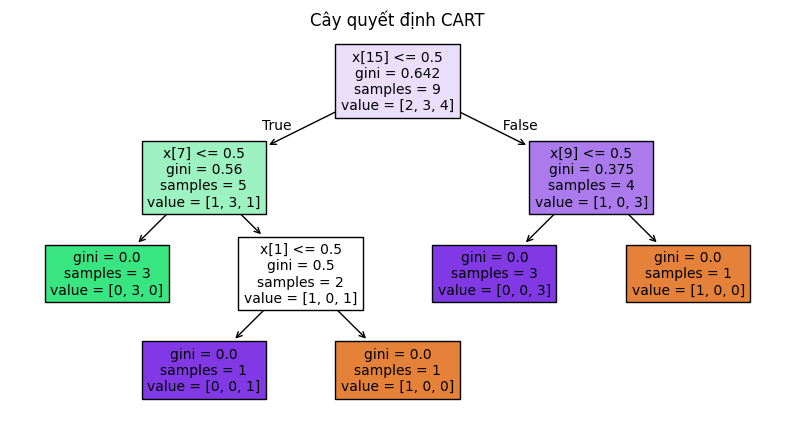

Cảm xúc
tốt            5
xấu            5
bình thường    4
Name: count, dtype: int64

Dự đoán Cảm xúc cho các sản phẩm mới dùng Naive Bayes: ['xấu' 'tốt' 'xấu' 'xấu']


In [115]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from collections import Counter
import math
import matplotlib.pyplot as plt

# Dữ liệu ban đầu
data = {
    "giảm": [
        "0..5", "11..20", "6..10", ">20", "0..5", "0..5", "0..5", "11..20",
        "0..5", "11..20", ">20", "0..5", "6..10", "11..20"
    ],
    "người": [
        "11..20", "6..10", "0..5", "0..5", ">20", "6..10", "6..10", ">20",
        "0..5", "0..5", "6..10", "0..5", "11..20", "6..10"
    ],
    "chuyển": [
        ">20", "6..10", "6..10", "11..20", "11..20", "0..5", "11..20", "0..5",
        "6..10", "11..20", "0..5", "11..20", ">20", ">20"
    ],
    "yêu": [
        "11..20", "0..5", "11..20", "6..10", "0..5", "0..5", "0..5", "11..20",
        "0..5", "11..20", "0..5", "0..5", "11..20", "11..20"
    ],
    "vừa": [
        ">20", "11..20", "0..5", "0..5", "6..10", "11..20", "6..10", "11..20",
        "6..10", "0..5", "0..5", "11..20", "0..5", "0..5"
    ],
    "đi": [
        "0..5", "0..5", "11..20", "6..10", "0..5", "0..5", "0..5", "0..5",
        "11..20", "0..5", "0..5", "0..5", "6..10", "0..5"
    ],
    "Cảm xúc": [
        "tốt", "tốt", "xấu", "bình thường", "xấu", "xấu", "tốt", "bình thường",
        "tốt", "tốt", "xấu", "bình thường", "bình thường", "xấu"
    ]
}

# Tạo DataFrame
df = pd.DataFrame(data)

# Chuyển đổi các cột không phải dạng số về dạng one-hot vector
features = df.drop('Cảm xúc', axis=1) 
labels = df['Cảm xúc']

# Hàm tính chỉ số Gini
def gini_index(data):
    labels = data["Cảm xúc"]
    label_counts = labels.value_counts(normalize=True)
    gini = 1 - sum(label_counts ** 2)
    return gini

# Hàm tính Gini Gain
def gini_gain(data, attribute):
    total_gini = gini_index(data)
    values = data[attribute].unique()
    weighted_gini = 0
    
    for value in values:
        subset = data[data[attribute] == value]
        weighted_gini += (len(subset) / len(data)) * gini_index(subset)
        
    return total_gini - weighted_gini

# Tính Gini Gain cho từng thuộc tính
attributes = ["giảm", "người", "chuyển", "yêu", "vừa", "đi"]
gini_results = {attr: gini_gain(df, attr) for attr in attributes}

# In kết quả Gini Gain
print("Chỉ số Gini cho các thuộc tính:")
for attr, gini_value in gini_results.items():
    print(f"    {attr}: {gini_value}")

features_onehot = pd.get_dummies(features)

# Tách ra thành 2 phần huấn luyện và kiểm thử
X_train, X_test, y_train, y_test = train_test_split(features_onehot, labels, test_size=0.3, random_state=42)

# Xây dựng cây quyết định
cart_clf = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
cart_clf.fit(X_train, y_train)

# Dự đoán trên dữ liệu kiểm thử
cart_pred = cart_clf.predict(X_test)
cart_score = metrics.accuracy_score(y_test, cart_pred)

print("\nĐộ chính xác của cây quyết định CART:", cart_score)

# Vẽ cây quyết định
fig, ax = plt.subplots(figsize=(10, 5))
tree.plot_tree(cart_clf, filled=True, fontsize=10, ax=ax)
plt.title("Cây quyết định CART")
plt.show()
# Kiểm tra phân bố nhãn
print(df['Cảm xúc'].value_counts())
print()

features = df.drop('Cảm xúc', axis=1) 
labels = df['Cảm xúc']

features_onehot = pd.get_dummies(features)
X_train, X_test, y_train, y_test = train_test_split(features_onehot, labels, test_size=0.3, random_state=42)

# Dùng Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Dự đoán
new_predictions = gnb.predict(new_data_onehot)
print("Dự đoán Cảm xúc cho các sản phẩm mới dùng Naive Bayes:", new_predictions)
